In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [36]:
df = pd.read_csv("RELIANCE.csv")

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018/09/25,1223.898682,1233.309448,1183.778931,1219.044678,1196.084229,9807108
1,2018/09/26,1227.365845,1242.175415,1215.627075,1239.649414,1216.300781,6457463
2,2018/09/27,1243.215576,1251.140381,1225.879883,1241.977295,1218.584839,10911205
3,2018/09/28,1248.069580,1259.758789,1235.587891,1246.137817,1222.667114,11177984
4,2018/10/01,1245.890259,1245.890259,1192.694458,1220.134399,1197.153320,7402199


In [38]:
df.shape


(1235, 7)

In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1978.490411,1999.831484,1955.186488,1976.626384,1960.063573,9.857871e+06
std,537.340322,540.592341,534.071824,537.227323,540.660181,7.435348e+06
min,907.596863,941.079529,867.427673,875.748779,864.012573,0.000000e+00
25%,1426.032654,1439.381103,1403.695069,1418.974487,1399.958313,5.477438e+06
50%,2106.000000,2126.500000,2081.449951,2104.449951,2086.519043,7.681157e+06
75%,2450.599976,2474.500000,2426.625000,2443.925049,2437.650024,1.135468e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,2831.846680,6.584835e+07


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


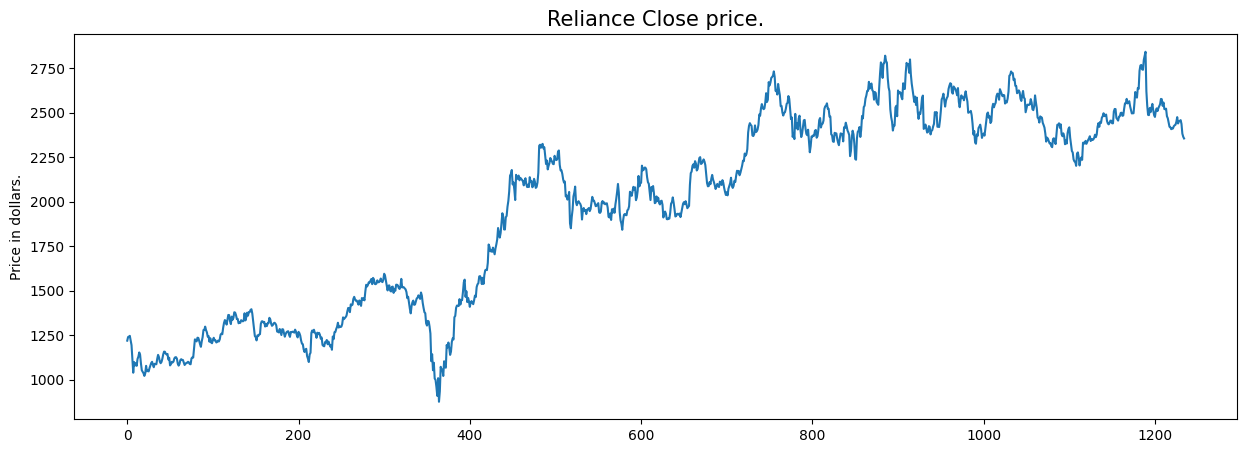

In [41]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Reliance Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [42]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018/09/25,1223.898682,1233.309448,1183.778931,1219.044678,1196.084229,9807108
1,2018/09/26,1227.365845,1242.175415,1215.627075,1239.649414,1216.300781,6457463
2,2018/09/27,1243.215576,1251.140381,1225.879883,1241.977295,1218.584839,10911205
3,2018/09/28,1248.069580,1259.758789,1235.587891,1246.137817,1222.667114,11177984
4,2018/10/01,1245.890259,1245.890259,1192.694458,1220.134399,1197.153320,7402199


we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [43]:
df[df['Close'] == df['Adj Close']].shape


(24, 7)

In [44]:
df = df.drop(['Adj Close'], axis=1)


In [45]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

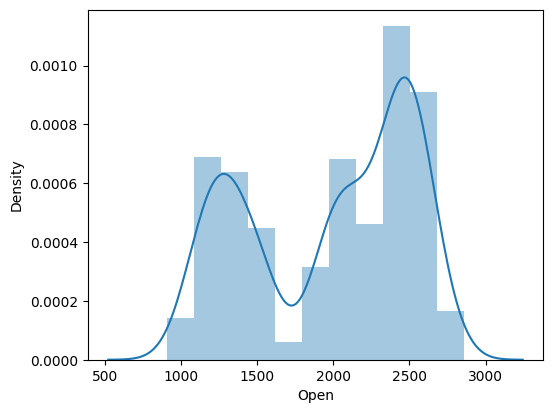

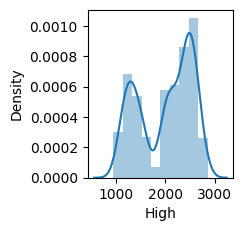

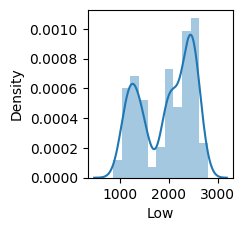

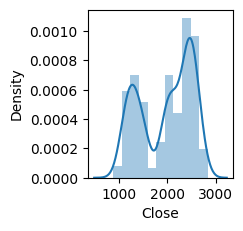

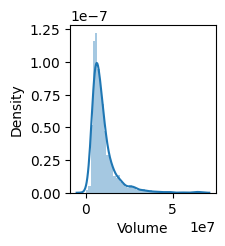

In [46]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()


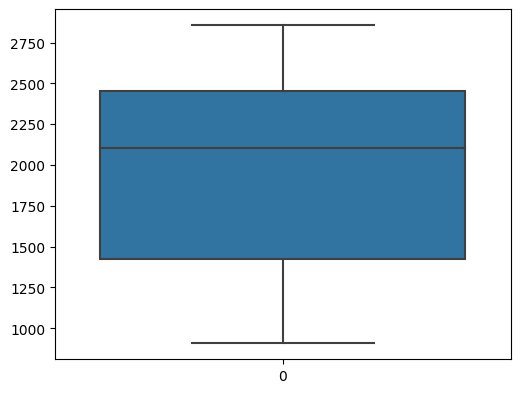

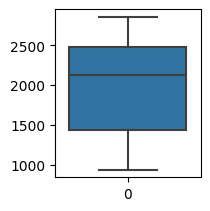

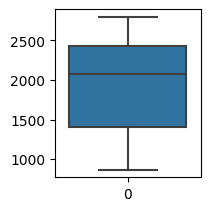

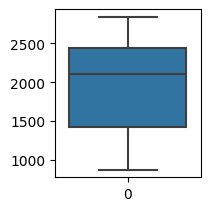

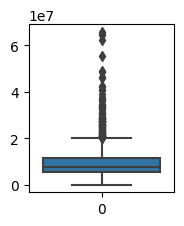

In [47]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()


In [52]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[2].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018/09/25,1223.898682,1233.309448,1183.778931,1219.044678,9807108,9,25,2018,0
1,2018/09/26,1227.365845,1242.175415,1215.627075,1239.649414,6457463,9,26,2018,0
2,2018/09/27,1243.215576,1251.140381,1225.879883,1241.977295,10911205,9,27,2018,0
3,2018/09/28,1248.069580,1259.758789,1235.587891,1246.137817,11177984,9,28,2018,0
4,2018/10/01,1245.890259,1245.890259,1192.694458,1220.134399,7402199,10,1,2018,0


In [53]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018/09/25,1223.898682,1233.309448,1183.778931,1219.044678,9807108,9,25,2018,0
1,2018/09/26,1227.365845,1242.175415,1215.627075,1239.649414,6457463,9,26,2018,0
2,2018/09/27,1243.215576,1251.140381,1225.879883,1241.977295,10911205,9,27,2018,1
3,2018/09/28,1248.069580,1259.758789,1235.587891,1246.137817,11177984,9,28,2018,0
4,2018/10/01,1245.890259,1245.890259,1192.694458,1220.134399,7402199,10,1,2018,0


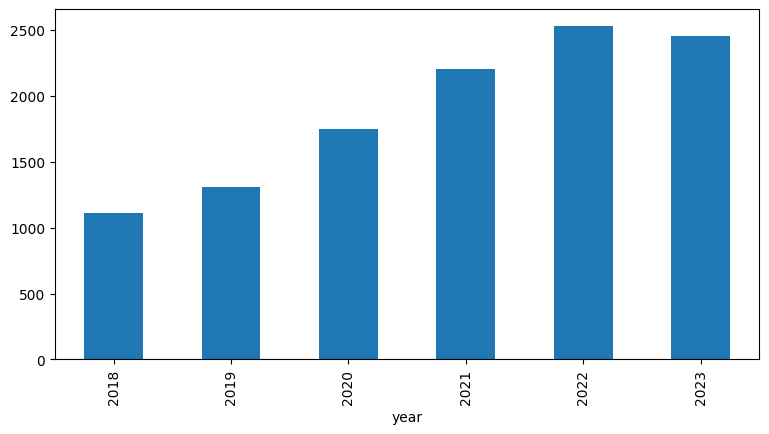

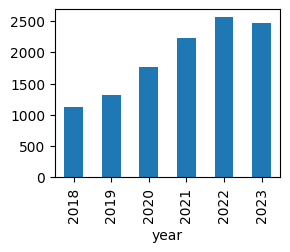

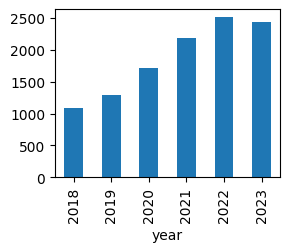

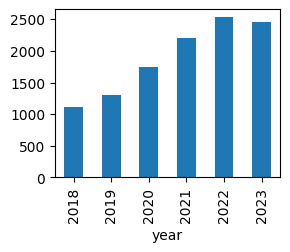

In [54]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()


In [55]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,1980.766081,2002.341934,1957.640639,1979.277430,9.829993e+06,6.536791,15.487334,2020.739445
1,1973.843785,1994.705467,1950.175425,1971.213289,9.914793e+06,6.534483,16.418719,2020.733990


In [56]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


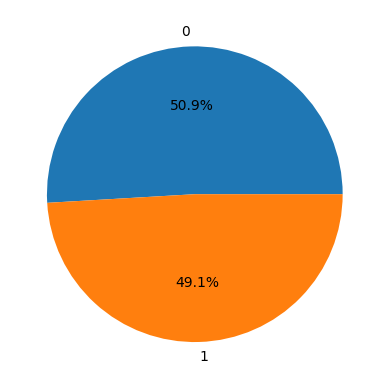

In [57]:
plt.pie(df['target'].value_counts().values,
labels=[0, 1], autopct='%1.1f%%')
plt.show()


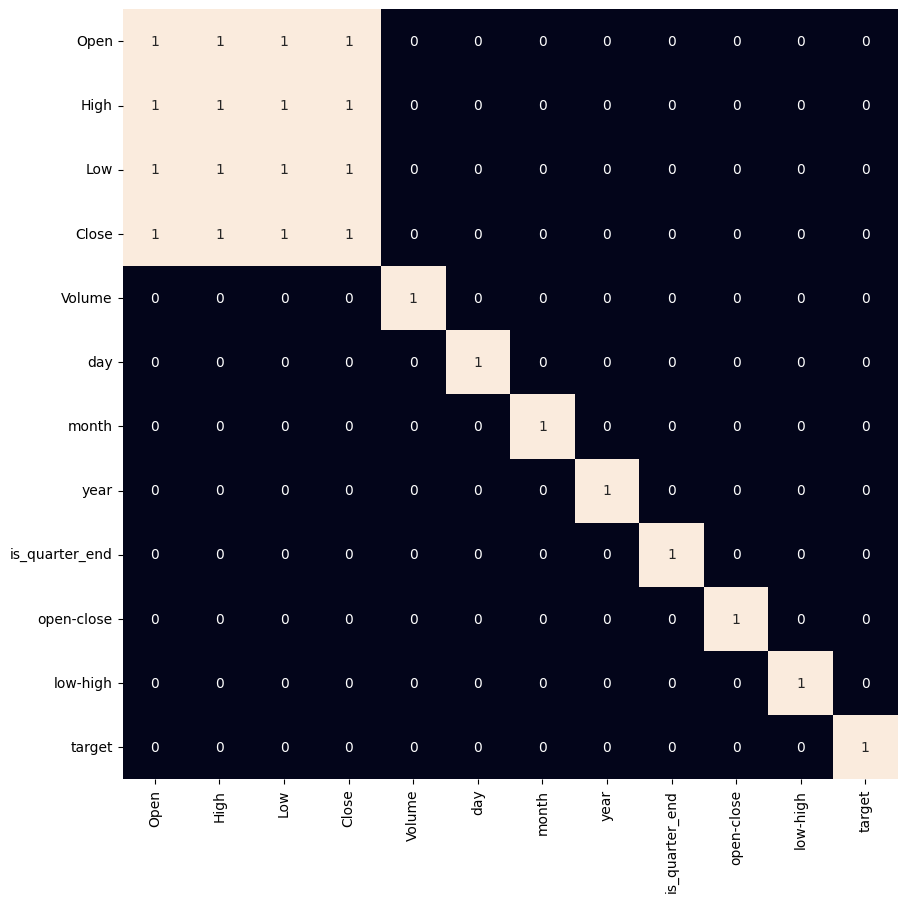

In [58]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [59]:
#Splitting and Normalization
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1111, 3) (124, 3)


Model Development and Evaluation

In [61]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.9929657116930257
Validation Accuracy :  0.38670568561872914



In [68]:
from sklearn.metrics import confusion_matrix

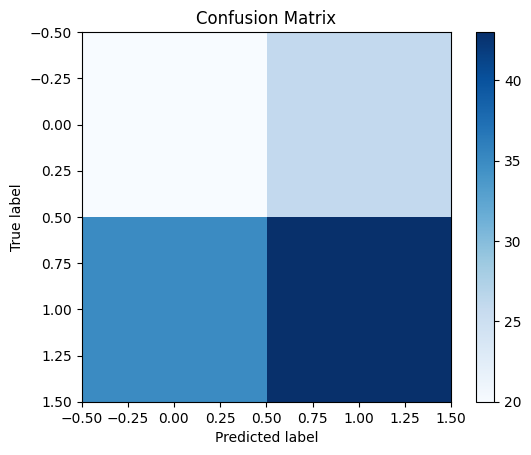

In [69]:
# we have model predictions in 'y_pred' and true labels in 'Y_valid'
y_pred = models[0].predict(X_valid)
conf_matrix = confusion_matrix(Y_valid, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


Conclusion:
We can observe that the accuracy achieved by the ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.